# 05 - Data visualization with matplotlib and seaborn


This notebook will show you:
- []
- []
- []

For this tutorial we are going to use the wine dataset also used in [notebook 3](./03-pipelines.ipynb):

In [88]:
from sklearn.datasets import load_wine

dataset = load_wine(as_frame=True)["frame"]  # Only store the dataframe
dataset

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


# Matplotlib

[Matplotlib](https://matplotlib.org/) is the most well-known and used visualization package in Python.
You can use matplotlib to create static, animated, and interactive plots.


## Figure and axes

Plots in matplotlib are composed of Figure and Axes. A __figure__ is the final image, which can contain more than one plot. We refer to the plots contained inside a figure as __axes__. Do not confuse axes with the __axis__ (x, y) of a figure! 

The following figure taken from the matplotlib tutorial ["Parts of a figure"](https://matplotlib.org/1.5.1/faq/usage_faq.html#parts-of-a-figure) illustrates these components:

![](../images/matplotlib_parts_figure.png)


We can create figure and axes by calling `subplots` (read the documentation [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)) in the following manner:

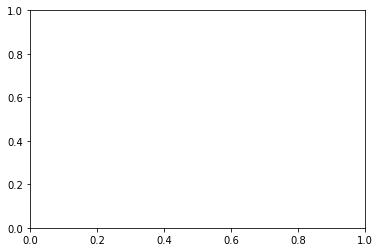

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

Let's inspect `fig` and `ax`:

In [4]:
print(fig)
print(ax)

Figure(432x288)
AxesSubplot(0.125,0.125;0.775x0.755)


`subplot` also allows us to create a Figure with mutliple Axes, and define how these should spread across rows (using parameter `nrows`) and columns (using parameter `ncols`). We can also specify the size of our figure in inches, using the parameter `figsize`: 

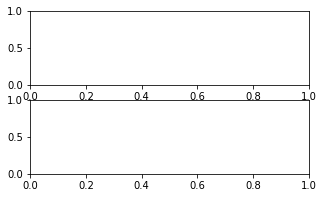

In [90]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5, 3))

Now that we have two axes, what does `ax` represent?

In [93]:
print(ax)

[<AxesSubplot:> <AxesSubplot:>]


`ax` is now an array containing two axes objects. This means we can also call `subplots` in the following manner:

`fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1)`.

### Exercise
How would you create a Figure with 2 Axes, one per column?

#### Answer

In [30]:
#fig, ax = plt.subplots(nrows=1, ncols=2)

## Other components of a plot

Figures and axes are not the only components of a Maplotlib plot. 

The following illustration taken from the [Matplotlib faq](https://matplotlib.org/2.0.2/faq/usage_faq.html) sketches other important components:

![](../images/matplotlib_anatomy_figure.png)

{TO-DO} show how you can set those attributes using methods of `ax`

## Inspecting the dataset

Let's now use this knowledge to create some plots based on the wine dataset. 

One common data visualization step during machine learning analysis is to visually inspect the correlation between the features and the predictor, or between the features themselves.

### Feature correlation

Let's plot the correlation between two of the values of two of the features of the dataset, alcohol and malic acid. 

As you can see looking at the following code, various methods of Axes can help us customize our plot. For example, we can use `set_xlabel` to determine the label in the x-axis, or `set_title` to add a title to the figure.

No handles with labels found to put in legend.


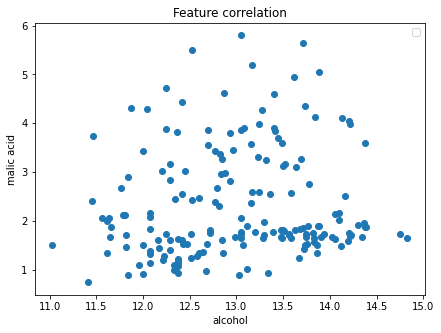

In [66]:
alcohol = dataset["alcohol"]
malic_acid = dataset["malic_acid"]

fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(alcohol, malic_acid)
ax.set_xlabel("alcohol")
ax.set_ylabel("malic acid")
ax.set_title("Feature correlation")
ax.legend()
plt.show()

### Exercise

We can customize our plot in many different ways. Read the documentation of `scatter` [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) and change the code above so that the samples are plotted in red instead of blue. Try also changing the transparency of the dots (hint: you can use the argument `alpha` for this).

#### Answer

In [94]:
#

### Class distribution per feature

- We can also explore the relationship between the predicted class and each feature. But the predicted classes are labels, so using a scatter plot wouldn't be the right option to illustrate this relationship. A more suitable possibility would be to use boxplots.

- Describe boxplots

- You can read the documentation of `boxplot` [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html)
- `boxplot` takes as input separate arrays with the values for each class

In [67]:
alcohol_by_class = [
    dataset.loc[dataset["target"]==c]["alcohol"].values for c in set(dataset["target"])
]

Let's plot the data:

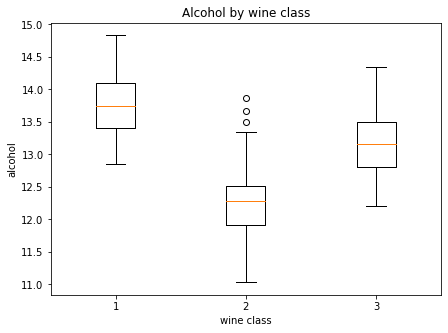

In [63]:
fig, ax = plt.subplots(figsize=(7,5))
ax.boxplot(alcohol_by_class)
ax.set_xlabel("wine class")
ax.set_ylabel("alcohol")
ax.set_title("Alcohol by wine class")
plt.show()

The classes labels are not very informative. Unfortunately, in this dataset we don't have available information on which types of wine each number represents. For illustration purposes, in this tutorial we will invent the mapping of such labels:

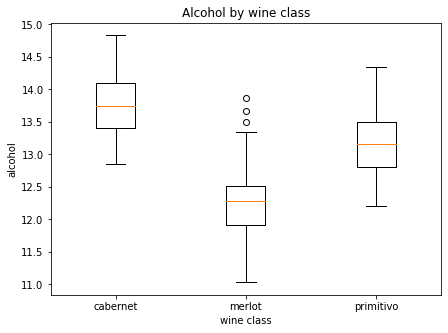

In [83]:
classes_names = ["cabernet", "merlot", "primitivo"]

fig, ax = plt.subplots(figsize=(7,5))
ax.boxplot(alcohol_by_class)

ax.set_xticklabels(classes_names)

ax.set_xlabel("wine class")
ax.set_ylabel("alcohol")
ax.set_title("Alcohol by wine class")
plt.show()

Let's now plot the relationship between all predictors and the labels. We can do this by creating multiple axes in a single plot:

In [84]:
# nrows = 5
# ncols = 2

# fig, axes = plt.subplots(nrows, ncols, figsize=(12,20), constrained_layout=True)
# fig.suptitle("Diabetes progression by feature", fontsize=16)

# for idx, ax in enumerate(axes.flatten()):
#     predictor = dataset['frame'].iloc[:, idx]
#     ax.scatter(predictor, dataset['frame']['target'])
#     ax.set_xlabel(f"{predictor.name}")
#     ax.set_ylabel("diabetes progression")

# plt.show()

#### Exercise

{To-Do}

# Seaborn

Going back to our features correlation example, what if besides plotting the observations we also wanted to visualiza the regression line that best fits the data?

We could achieve this by calculating the line of best fit using any Python stats package (such as _statsmodel_), and then use `plot` in _matplotlib_ to visualize the result on top of the scatterplot. However, there is another great visualization package in Python where doing this is very easy: [_seaborn_](https://seaborn.pydata.org/).

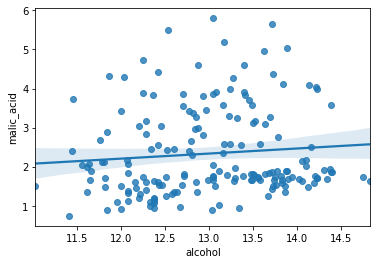

In [33]:
import seaborn as sns

sns.regplot(x=alcohol, y=malic_acid)
plt.show()

!! Talk about the integration between seaborn an pandas

{To-Do: Use seaborn to plot violin-plots}

### Exercise

# Check your knowledge

Load the ABIDE 2 dataset and:

1. Subselect some features (ROIs) and plot their correlation. Check if ROIs from closer brain areas are more correlated than those farer apart.
2. Subselect some features (ROIs) and plot their distribution for each class. Do you observe some interesting pattern?


# Additional resources
- [Data Visualization in Python _by Kirstie Whitaker_](https://www.youtube.com/watch?v=uaKu5a6P3oU)
- [Matplotlib cheatsheet](https://github.com/matplotlib/cheatsheets/blob/master/cheatsheets-1.png)
- [Parts of a figure](https://matplotlib.org/1.5.1/faq/usage_faq.html#parts-of-a-figure)
- [The lifecycle of a plot](https://matplotlib.org/stable/tutorials/introductory/lifecycle.html): Official matplotlib guide to creating a plot.